In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

In [10]:
X = boston.data
Y = boston.target

print(X.shape,'\n',Y.shape)

(506, 13) 
 (506,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
#1. Create an Object
lr = LinearRegression(normalize=True)

#2. Train the model
lr.fit(X_train,Y_train)

#3. Output parameters
print(lr.coef_)#gives parameter of 13 features
print(lr.intercept_)#gives bias term ie thetazero

[-1.10991116e-01  4.30550994e-02 -2.07934721e-02  2.55682523e+00
 -1.69096823e+01  3.68437433e+00 -2.89748582e-03 -1.53149744e+00
  2.68512281e-01 -9.84778028e-03 -9.94062106e-01  7.91832882e-03
 -5.84862828e-01]
39.16475170527171


In [17]:
print("Training Score %.4f" %lr.score(X_train,Y_train))
print("Testing Score %.4f" %lr.score(X_test,Y_test))

Training Score 0.7589
Testing Score 0.6258


# Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
score = cross_val_score(lr,X_train,Y_train,cv=10,scoring='r2')
print(score)

[0.74059214 0.75762488 0.65570957 0.84393021 0.75218661 0.79317316
 0.40007541 0.73448973 0.81126789 0.67465986]


# Closed Form Regression

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [49]:
#Generate Dataset
X,Y = make_regression(n_samples = 400,n_features = 1,n_informative=1,noise = 1.8,random_state=11)

print(X.shape)
print(Y.shape)

(400, 1)
(400,)


In [50]:
Y=Y.reshape((-1,1))
print(Y.shape)

#Normalize
X = (X-X.mean())/X.std()

(400, 1)


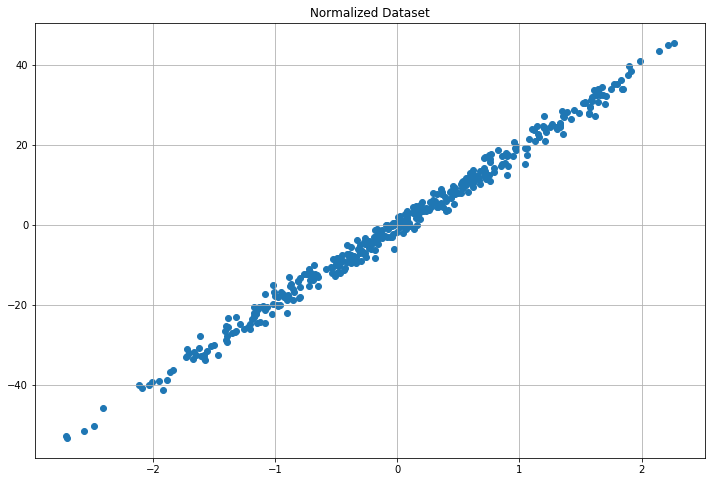

In [69]:
#Visualize
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(X,Y)
plt.title('Normalized Dataset')
plt.show()

In [52]:
#Appending 1 column in X matrix
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [53]:
def predict(X,theta):
    return np.dot(X,theta)

def ClosedFormSol(X,Y):
    Y = np.mat(Y) #Convert the Y to the matrix form
    firstdot = np.dot(X.T,X)
    seconddot = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstdot)*seconddot
    return theta

In [54]:
theta_value = ClosedFormSol(X_,Y)
print(theta_value)

[[19.45877082]
 [-0.29187892]]


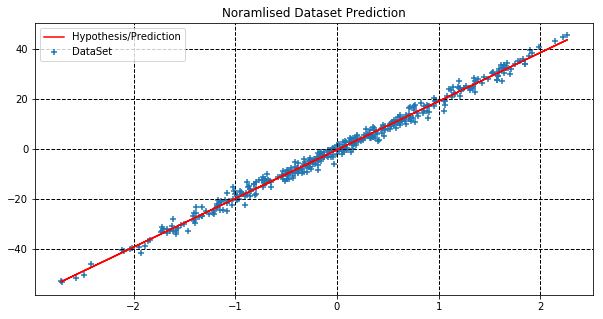

In [75]:
plt.figure(figsize=(10,5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.scatter(X,Y,label="DataSet",marker='+')
plt.plot(X,predict(X_,theta_value),color = 'red',label="Hypothesis/Prediction")
plt.legend()
plt.title("Noramlised Dataset Prediction")
plt.show()

# Locally Weighted Solution

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [85]:
dx = pd.read_csv('Datasets\Locally Weighted Regression\weightedX.csv')
dy = pd.read_csv('Datasets\Locally Weighted Regression\weightedY.csv')
print(dx.shape,"  \n",dy.shape)

(99, 1)   
 (99, 1)


In [86]:
X = dx.values
Y = dy.values

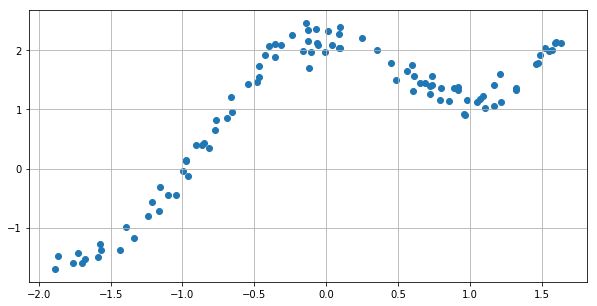

In [89]:
#Normalize and Visualize
u = X.mean()
std = X.std()

X = (X-u)/std

plt.figure(figsize=(10,5))
plt.grid()
plt.scatter(X,Y)
plt.show()

In [92]:
def getW(query_pnt,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    x = query_pnt
    for i in range(M):
        W[i,i] = np.exp(np.dot((X[i]-x),(X[i]-x).T)/(-2*tau**2))
    return W    

In [94]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [110]:
def predict(X,Y,query_pnt,tau):
    oens = np.ones((M,1))
    X_ = np.hstack((X,oens))
    qx = np.mat([query_pnt,1])
    W = getW(qx,X_,tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred

In [111]:
theta,pred = predict(X,Y,1.0,1.0)

In [112]:
print(theta)
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


In [143]:
def tauPrediction(tau):
    tau = tau
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.figure(figsize=(10,5))
    plt.grid(linestyle='--',linewidth=1)
    plt.scatter(XO,YO,marker='+')
    plt.scatter(X_test,Y_test,color='red')
    plt.title("Plot of "+str(tau))
    

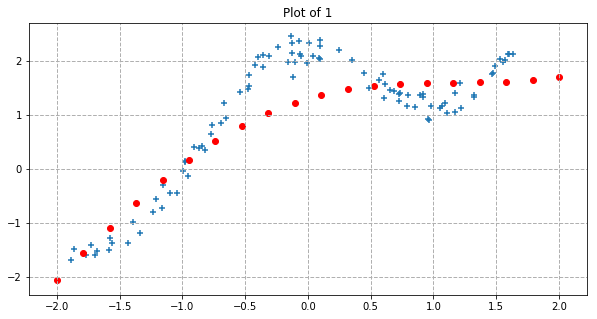

In [144]:
tauPrediction(1)

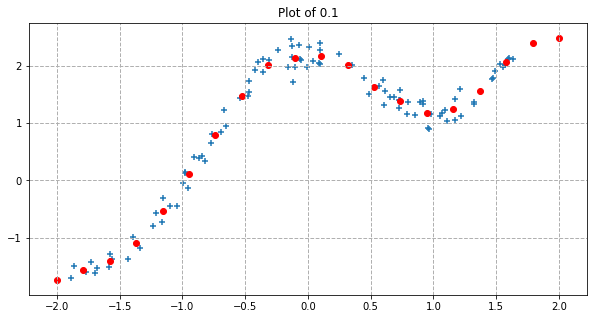

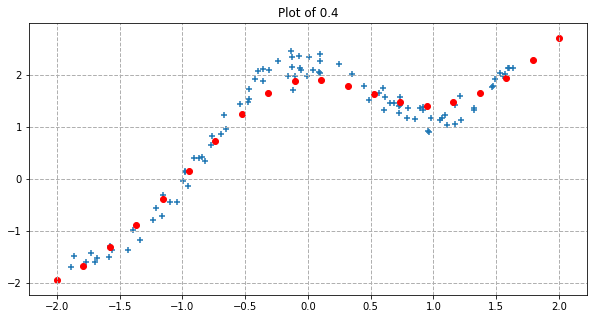

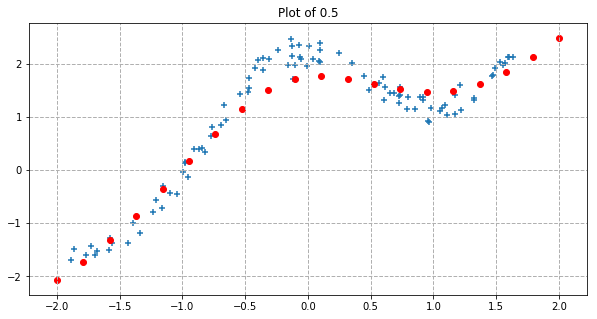

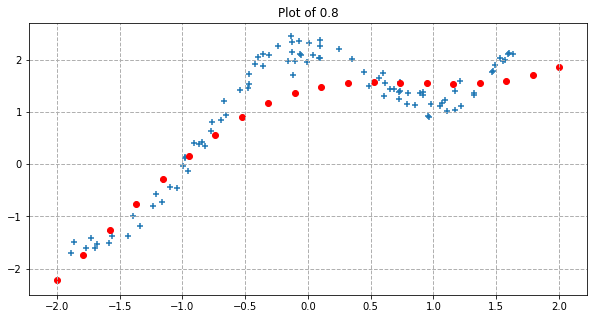

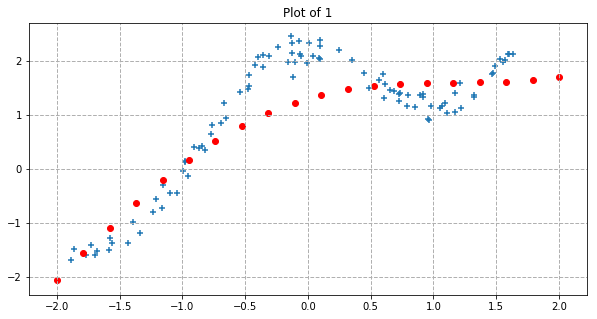

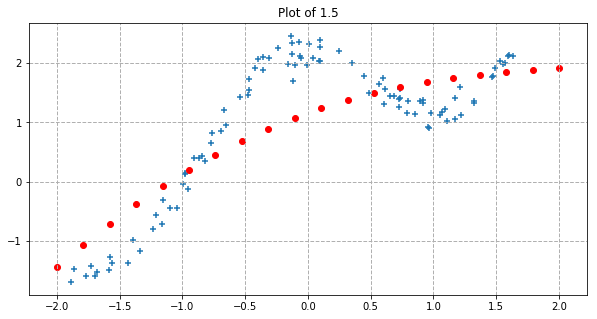

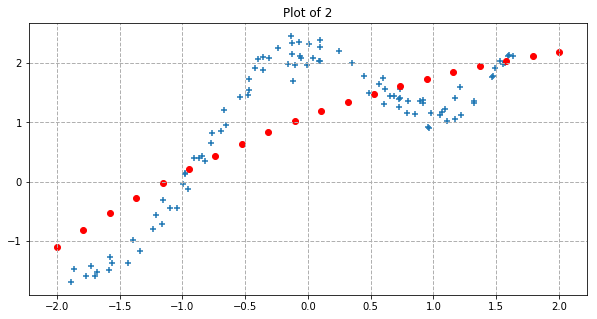

In [146]:
tau =[0.1,0.4,0.5,0.8,1,1.5,2]
for t in tau:
    tauPrediction(t)